In [114]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import tqdm #google

# Data pre-processing
from sklearn.preprocessing import StandardScaler
# Data splitting
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputClassifier

# evaluation metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [115]:
!pip install seaborn


[notice] A new release of pip is available: 23.0 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [116]:
df_with_dummies = pd.read_csv('formatted_dataset.csv',index_col=0)

In [117]:
df_with_dummies=df_with_dummies[['Marital status', 
                                 'Course', 
                                 'Daytime/evening attendance', 
                                 "Mother's qualification",
                                 'Educational special needs', 
                                 'Debtor', 
                                 'Gender', 
                                 'Scholarship holder', 
                                 'Age at enrollment',
                                 'International',
                                 'Curricular units 2nd sem (approved)',
                                 'Target']]

### Functions

In [118]:
# from udacity example
# create dummy variables for categorical data in sample
def create_dummy(df, cat_cols, dummy_na):
    '''
    create dummy variables for categorical data in sample

    '''
    for column in cat_cols:
        try:
            df = pd.concat([df.drop(column, axis=1), pd.get_dummies(df[column], prefix=column, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [119]:
def f1_score_display(classifier, y_test, y_pred):
    '''
    assess the accuracy using classification report. f1-score is extracted from the string output and put into 
    a dataframe so that it can be put into a visualisation and more easily compared.
    '''
    classification_report(y_test, y_pred).split('\n')
    category_list=[]
    f1_list = []
    for count, value in enumerate(classification_report(y_test, y_pred).strip().split('\n')):
        x_list = value.strip().split('  ')
        if (count!=0) & (x_list[0] in ['Graduate','Dropout']):
            category_list.append(x_list[0])
            counter=0
            for count, value in enumerate(x_list):
                if (len(value)>0):

                    if counter == 3:
                        f1_list.append(float(value.split()[0]))
                    counter+=1
    return pd.DataFrame(
        {
            'classifier':classifier,
            'category': category_list,
            'f1-score': f1_list
        }
    )

In [120]:
def coefficients(df, predictor):
    '''
    returns the coefficients to determine which variable is the biggest predictor of price.
    parameter data_types is included so we can generate models depending on whether the variable is 
    continuous or categorical.
    '''
    
    X =dummy.drop([predictor], axis=1)
    y = dummy[[predictor]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    lm_model  = LogisticRegression(solver='newton-cg')
    lm_model.fit(X_train, y_train)
    cdf = pd.DataFrame({"Feature": X_train.columns.tolist(), "Coefficients": lm_model.coef_[0], "abs_coef": np.abs(lm_model.coef_[0])})
    cdf_y_pred = lm_model.predict(X_test)
    cdf_model_test_acc = round(accuracy_score(y_test, cdf_y_pred), 3)
    print(f"training model accuracy: {cdf_model_test_acc}")
    return cdf

In [121]:
# these columns are categorical variables. These need to be converted into dummy variables so that all variables 
# in the model are numerical

all_cols=[
    'Marital status', 
    'Course',
    'Daytime/evening attendance',
    "Mother's qualification"
]

dummy = create_dummy(df_with_dummies, all_cols, dummy_na=False)
dummy

,Educational special needs,Debtor,Gender,Scholarship holder,Age at enrollment,International,Curricular units 2nd sem (approved),Target,Marital status_Facto union,Marital status_Legally Separated,...,Mother's qualification_Higher Education—bachelor’s degree,Mother's qualification_Higher Education—degree,Mother's qualification_Higher Education—doctorate,Mother's qualification_Higher Education—master’s degree,Mother's qualification_Other—11th Year of Schooling,Mother's qualification_Secondary Education—12th Year of Schooling or Equivalent,Mother's qualification_Supplementary Accounting and Administration,Mother's qualification_Technical-professional course,Mother's qualification_Technological specialization course,Mother's qualification_Unknown
0,0,0,1,0,20,0,0,Dropout,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,19,0,6,Graduate,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,1,0,19,0,0,Dropout,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,20,0,5,Graduate,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,45,0,6,Graduate,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,0,0,1,0,19,0,5,Graduate,0,0,...,0,0,0,0,0,1,0,0,0,0
4420,0,1,0,0,18,1,2,Dropout,0,0,...,0,0,0,0,0,1,0,0,0,0
4421,0,0,0,1,30,0,1,Dropout,0,0,...,0,0,0,0,0,0,0,0,0,0
4422,0,0,0,1,20,0,5,Graduate,0,0,...,0,0,0,0,0,0,0,0,0,0


In [122]:
# Normalizing data
y = np.array(dummy['Target'])
X_features = dummy.drop('Target', axis = 1)

scaler =  StandardScaler()
X = scaler.fit_transform(X_features)
X

array([[-0.10555596, -0.35830222,  1.38069731, ..., -0.01659994,
        -0.01659994, -0.04068942],
       [-0.10555596, -0.35830222,  1.38069731, ..., -0.01659994,
        -0.01659994, -0.04068942],
       [-0.10555596, -0.35830222,  1.38069731, ..., -0.01659994,
        -0.01659994, -0.04068942],
       ...,
       [-0.10555596, -0.35830222, -0.72427171, ..., -0.01659994,
        -0.01659994, -0.04068942],
       [-0.10555596, -0.35830222, -0.72427171, ..., -0.01659994,
        -0.01659994, -0.04068942],
       [-0.10555596, -0.35830222, -0.72427171, ..., -0.01659994,
        -0.01659994, -0.04068942]])

In [123]:
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.2,random_state=42
)

### Logistic regression

In [124]:
# train model
log_model = LogisticRegression(random_state = 42, max_iter= 1000)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [125]:
# predict target values
log_y_test_pred = log_model.predict(X_test)

In [126]:
# validate results
log_model_test_acc = round(accuracy_score(y_test, log_y_test_pred), 3)
print(f"testing model accuracy: {log_model_test_acc}")

testing model accuracy: 0.886


In [127]:
# see f1-score for model
print(classification_report(y_test, log_y_test_pred))

              precision    recall  f1-score   support

     Dropout       0.87      0.82      0.85       277
    Graduate       0.89      0.92      0.91       449

    accuracy                           0.89       726
   macro avg       0.88      0.87      0.88       726
weighted avg       0.89      0.89      0.89       726



### Decision Trees

In [128]:
# train model
dt_model = tree.DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [129]:
# predict target values
dt_y_test_pred = dt_model.predict(X_test)
dt_y_test_pred

array(['Graduate', 'Dropout', 'Dropout', 'Graduate', 'Dropout',
       'Graduate', 'Graduate', 'Graduate', 'Dropout', 'Dropout',
       'Dropout', 'Graduate', 'Graduate', 'Graduate', 'Graduate',
       'Dropout', 'Graduate', 'Dropout', 'Graduate', 'Graduate',
       'Dropout', 'Dropout', 'Graduate', 'Graduate', 'Dropout', 'Dropout',
       'Graduate', 'Dropout', 'Dropout', 'Dropout', 'Dropout', 'Dropout',
       'Graduate', 'Dropout', 'Dropout', 'Graduate', 'Dropout', 'Dropout',
       'Graduate', 'Graduate', 'Dropout', 'Graduate', 'Dropout',
       'Graduate', 'Dropout', 'Graduate', 'Dropout', 'Graduate',
       'Dropout', 'Graduate', 'Dropout', 'Graduate', 'Graduate',
       'Dropout', 'Dropout', 'Graduate', 'Dropout', 'Dropout', 'Dropout',
       'Dropout', 'Graduate', 'Graduate', 'Graduate', 'Graduate',
       'Graduate', 'Dropout', 'Dropout', 'Graduate', 'Graduate',
       'Dropout', 'Dropout', 'Graduate', 'Dropout', 'Dropout', 'Graduate',
       'Graduate', 'Dropout', 'Dropout', 

In [130]:
# validate results
dt_model_test_acc = round(accuracy_score(y_test, dt_y_test_pred), 3)
print(f"training model accuracy: {dt_model_test_acc}")

training model accuracy: 0.843


In [131]:
# see f1-score for model
print(classification_report(y_test, dt_y_test_pred))

              precision    recall  f1-score   support

     Dropout       0.79      0.80      0.80       277
    Graduate       0.88      0.87      0.87       449

    accuracy                           0.84       726
   macro avg       0.83      0.84      0.83       726
weighted avg       0.84      0.84      0.84       726



### Support Vector Machine

In [132]:
# train model
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)

SVC()

In [133]:
# predict target values
svm_y_test_pred = svm_model.predict(X_test)
svm_y_test_pred

array(['Graduate', 'Graduate', 'Dropout', 'Graduate', 'Dropout',
       'Graduate', 'Dropout', 'Dropout', 'Dropout', 'Dropout', 'Graduate',
       'Graduate', 'Graduate', 'Graduate', 'Graduate', 'Dropout',
       'Dropout', 'Dropout', 'Graduate', 'Graduate', 'Dropout',
       'Graduate', 'Graduate', 'Graduate', 'Dropout', 'Dropout',
       'Graduate', 'Graduate', 'Graduate', 'Dropout', 'Dropout',
       'Dropout', 'Graduate', 'Graduate', 'Graduate', 'Graduate',
       'Dropout', 'Dropout', 'Dropout', 'Graduate', 'Dropout', 'Graduate',
       'Dropout', 'Dropout', 'Dropout', 'Graduate', 'Dropout', 'Graduate',
       'Dropout', 'Graduate', 'Dropout', 'Graduate', 'Graduate',
       'Dropout', 'Dropout', 'Graduate', 'Dropout', 'Dropout', 'Graduate',
       'Dropout', 'Dropout', 'Graduate', 'Graduate', 'Graduate',
       'Graduate', 'Dropout', 'Dropout', 'Graduate', 'Dropout', 'Dropout',
       'Dropout', 'Graduate', 'Dropout', 'Dropout', 'Graduate',
       'Graduate', 'Dropout', 'Graduate'

In [134]:
# validate results
svm_model_test_acc = round(accuracy_score(y_test, svm_y_test_pred), 3)
print(f"training model accuracy: {svm_model_test_acc}")

training model accuracy: 0.866


In [135]:
# see f1-score for model
print(classification_report(y_test, svm_y_test_pred))

              precision    recall  f1-score   support

     Dropout       0.87      0.77      0.81       277
    Graduate       0.87      0.93      0.90       449

    accuracy                           0.87       726
   macro avg       0.87      0.85      0.86       726
weighted avg       0.87      0.87      0.86       726



### Neural Networks

In [136]:
# train model
nn_model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,2), random_state=1)

In [137]:
nn_model.fit(X_train, y_train)

/Users/alex.smithglean.co/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [138]:
# predict target values
nn_y_test_pred = nn_model.predict(X_test)
nn_y_test_pred

array(['Graduate', 'Graduate', 'Dropout', 'Graduate', 'Dropout',
       'Graduate', 'Graduate', 'Dropout', 'Dropout', 'Dropout',
       'Graduate', 'Graduate', 'Graduate', 'Graduate', 'Graduate',
       'Graduate', 'Dropout', 'Dropout', 'Graduate', 'Graduate',
       'Dropout', 'Graduate', 'Graduate', 'Graduate', 'Dropout',
       'Dropout', 'Graduate', 'Graduate', 'Graduate', 'Dropout',
       'Dropout', 'Dropout', 'Graduate', 'Graduate', 'Graduate',
       'Graduate', 'Dropout', 'Dropout', 'Graduate', 'Graduate',
       'Dropout', 'Graduate', 'Dropout', 'Dropout', 'Dropout', 'Graduate',
       'Dropout', 'Graduate', 'Dropout', 'Graduate', 'Dropout',
       'Graduate', 'Graduate', 'Graduate', 'Dropout', 'Graduate',
       'Dropout', 'Dropout', 'Graduate', 'Dropout', 'Dropout', 'Graduate',
       'Graduate', 'Graduate', 'Graduate', 'Dropout', 'Graduate',
       'Dropout', 'Dropout', 'Dropout', 'Dropout', 'Graduate', 'Dropout',
       'Dropout', 'Graduate', 'Graduate', 'Graduate', 'Grad

In [139]:
# validate results
nn_model_test_acc = round(accuracy_score(y_test, nn_y_test_pred), 3)
print(f"training model accuracy: {nn_model_test_acc}")

training model accuracy: 0.862


In [140]:
# see f1-score for model
print(classification_report(y_test, nn_y_test_pred))

              precision    recall  f1-score   support

     Dropout       0.84      0.79      0.81       277
    Graduate       0.87      0.91      0.89       449

    accuracy                           0.86       726
   macro avg       0.86      0.85      0.85       726
weighted avg       0.86      0.86      0.86       726



### Random Forest

In [141]:
# train model
rf_model = RandomForestClassifier()

In [142]:
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [143]:
# predict target values
rf_y_test_pred = rf_model.predict(X_test)
rf_y_test_pred

array(['Graduate', 'Dropout', 'Dropout', 'Graduate', 'Dropout',
       'Graduate', 'Graduate', 'Dropout', 'Dropout', 'Dropout', 'Dropout',
       'Graduate', 'Graduate', 'Graduate', 'Graduate', 'Dropout',
       'Dropout', 'Dropout', 'Graduate', 'Graduate', 'Dropout', 'Dropout',
       'Graduate', 'Graduate', 'Dropout', 'Dropout', 'Graduate',
       'Graduate', 'Graduate', 'Dropout', 'Dropout', 'Dropout',
       'Graduate', 'Dropout', 'Dropout', 'Graduate', 'Dropout', 'Dropout',
       'Dropout', 'Graduate', 'Dropout', 'Graduate', 'Dropout',
       'Graduate', 'Dropout', 'Graduate', 'Dropout', 'Graduate',
       'Dropout', 'Graduate', 'Dropout', 'Graduate', 'Graduate',
       'Graduate', 'Dropout', 'Graduate', 'Dropout', 'Dropout', 'Dropout',
       'Dropout', 'Dropout', 'Graduate', 'Graduate', 'Graduate',
       'Graduate', 'Dropout', 'Dropout', 'Graduate', 'Graduate',
       'Dropout', 'Dropout', 'Graduate', 'Dropout', 'Dropout', 'Graduate',
       'Graduate', 'Dropout', 'Dropout', '

In [144]:
# validate results
rf_model_test_acc = round(accuracy_score(y_test, rf_y_test_pred), 3)
print(f"training model accuracy: {rf_model_test_acc}")

training model accuracy: 0.88


In [145]:
# see f1-score for model
print(classification_report(y_test, rf_y_test_pred))

              precision    recall  f1-score   support

     Dropout       0.85      0.83      0.84       277
    Graduate       0.90      0.91      0.90       449

    accuracy                           0.88       726
   macro avg       0.87      0.87      0.87       726
weighted avg       0.88      0.88      0.88       726



### K Neighbours

In [146]:
# train model
k_model = KNeighborsClassifier()

In [147]:
k_model.fit(X_train, y_train)

KNeighborsClassifier()

In [148]:
# predict target values
k_y_test_pred = k_model.predict(X_test)
k_y_test_pred

array(['Graduate', 'Graduate', 'Graduate', 'Graduate', 'Dropout',
       'Graduate', 'Graduate', 'Graduate', 'Dropout', 'Dropout',
       'Graduate', 'Graduate', 'Graduate', 'Graduate', 'Graduate',
       'Dropout', 'Graduate', 'Dropout', 'Graduate', 'Graduate',
       'Dropout', 'Graduate', 'Graduate', 'Graduate', 'Dropout',
       'Graduate', 'Graduate', 'Graduate', 'Graduate', 'Graduate',
       'Dropout', 'Dropout', 'Graduate', 'Graduate', 'Dropout',
       'Graduate', 'Dropout', 'Graduate', 'Dropout', 'Graduate',
       'Dropout', 'Graduate', 'Dropout', 'Dropout', 'Dropout', 'Graduate',
       'Dropout', 'Graduate', 'Graduate', 'Graduate', 'Dropout',
       'Graduate', 'Graduate', 'Dropout', 'Dropout', 'Graduate',
       'Dropout', 'Dropout', 'Dropout', 'Graduate', 'Graduate',
       'Graduate', 'Graduate', 'Graduate', 'Graduate', 'Dropout',
       'Graduate', 'Graduate', 'Dropout', 'Dropout', 'Dropout',
       'Graduate', 'Graduate', 'Dropout', 'Graduate', 'Graduate',
       'Gra

In [149]:
# validate results
k_model_test_acc = round(accuracy_score(y_test, k_y_test_pred), 3)
print(f"training model accuracy: {k_model_test_acc}")

training model accuracy: 0.792


In [150]:
# see f1-score for model
print(classification_report(y_test, k_y_test_pred))

              precision    recall  f1-score   support

     Dropout       0.79      0.62      0.70       277
    Graduate       0.79      0.90      0.84       449

    accuracy                           0.79       726
   macro avg       0.79      0.76      0.77       726
weighted avg       0.79      0.79      0.79       726



Bargraph of f1-scores for each model

In [151]:
# get f1 scores and append resulting dataframes

r_df = f1_score_display('Random Forest',y_test, rf_y_test_pred)
l_df = f1_score_display('Logistic regression',y_test, log_y_test_pred)
k_df = f1_score_display('K-Neighbours',y_test, k_y_test_pred)
n_df = f1_score_display('Neural Networks',y_test, nn_y_test_pred)
s_df = f1_score_display('Support Vector Machine',y_test, svm_y_test_pred)
d_df = f1_score_display('Decision Trees',y_test, dt_y_test_pred)
f1_df = pd.concat([r_df, l_df, k_df, n_df, s_df, d_df])
f1_df

,classifier,category,f1-score
0,Random Forest,Dropout,0.84
1,Random Forest,Graduate,0.90
0,Logistic regression,Dropout,0.85
1,Logistic regression,Graduate,0.91
0,K-Neighbours,Dropout,0.70
1,K-Neighbours,Graduate,0.84
0,Neural Networks,Dropout,0.81
1,Neural Networks,Graduate,0.89
0,Support Vector Machine,Dropout,0.81
1,Support Vector Machine,Graduate,0.90


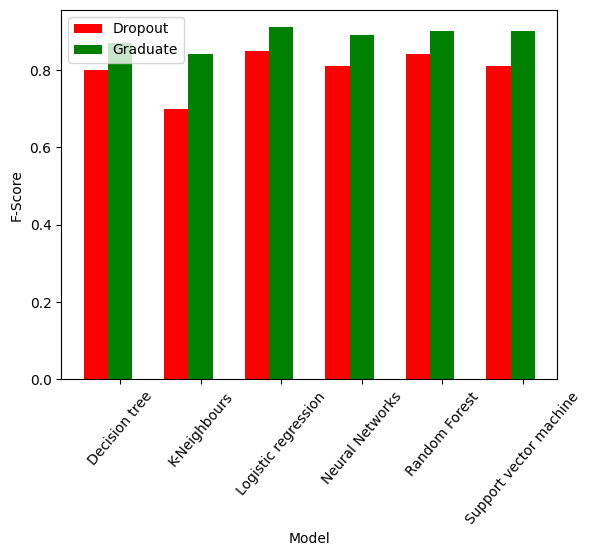

In [152]:
# visualisation of comparison of models
vis=f1_df
N = 6
ind = np.arange(N)  
width = 0.3
yvals =list(vis[vis['category']=='Dropout'].sort_values(by='classifier')['f1-score'])
barf = plt.bar(ind, yvals, width, color = 'r') 
nvals =list(vis[vis['category']=='Graduate'].sort_values(by='classifier')['f1-score'])
barm = plt.bar(ind+width, nvals, width, color='g')
plt.xlabel("Model") 
plt.ylabel('F-Score') 
plt.xticks(ind+width,['Decision tree', 'K-Neighbours',
                      'Logistic regression', 'Neural Networks', 
                      'Random Forest', 'Support vector machine'
                     ], rotation=50) 
plt.legend( (barf, barm), ('Dropout', 'Graduate') ) 
plt.show() 

### optimised model

Random Forest

In [153]:
# Choose hyperparameters
parameters = {
    'n_estimators': [10,50,100,1000],
    'max_features': ['sqrt', 'log2', None]
}

In [154]:
# train model
cv = GridSearchCV(RandomForestClassifier(), param_grid=parameters, verbose=1, error_score='raise')

In [155]:
best_cv=cv.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [156]:
# predict target values
cv_y_pred = cv.predict(X_test)

In [157]:
# chosen parameter from optimised model
best_cv.best_estimator_

RandomForestClassifier()

In [158]:
# validate results
cv_model_test_acc = round(accuracy_score(y_test, cv_y_pred), 3)
print(f"training model accuracy: {cv_model_test_acc}")

training model accuracy: 0.877


In [159]:
# see f1-score for model
print(classification_report(y_test, cv_y_pred))

              precision    recall  f1-score   support

     Dropout       0.86      0.82      0.84       277
    Graduate       0.89      0.92      0.90       449

    accuracy                           0.88       726
   macro avg       0.87      0.87      0.87       726
weighted avg       0.88      0.88      0.88       726



Logistic regression

In [160]:
# create hyperparameters
parameters = [
    {    
        'solver':['newton-cg', 'lbfgs', 'liblinear'],
        'penalty':['l2'],
        'C':[100, 10, 1.0, 0.1, 0.01]
    }
]

In [161]:
# train model
clf = GridSearchCV(LogisticRegression(), param_grid=parameters, cv=3, verbose=1, n_jobs=-1, error_score='raise')

In [162]:
best_clf=clf.fit(X_train, y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


In [163]:
# predict target values
clf_y_pred = clf.predict(X_test)

In [164]:
# validate results
clf_model_test_acc = round(accuracy_score(y_test, clf_y_pred), 3)
print(f"training model accuracy: {clf_model_test_acc}")

training model accuracy: 0.886


In [165]:
# chosen parameter from optimised model
best_clf.best_estimator_

LogisticRegression(solver='newton-cg')

In [166]:
# see f1-score for model
print(classification_report(y_test, clf_y_pred))

              precision    recall  f1-score   support

     Dropout       0.87      0.82      0.85       277
    Graduate       0.89      0.92      0.91       449

    accuracy                           0.89       726
   macro avg       0.88      0.87      0.88       726
weighted avg       0.89      0.89      0.89       726



In [167]:
# get f1 scores and append resulting dataframes
rii_df = f1_score_display('Random Forest',y_test, cv_y_pred)
lii_df = f1_score_display('Logistic regression',y_test, clf_y_pred)
f1_df2 = pd.concat([rii_df, lii_df])
f1_df2

,classifier,category,f1-score
0,Random Forest,Dropout,0.84
1,Random Forest,Graduate,0.90
0,Logistic regression,Dropout,0.85
1,Logistic regression,Graduate,0.91


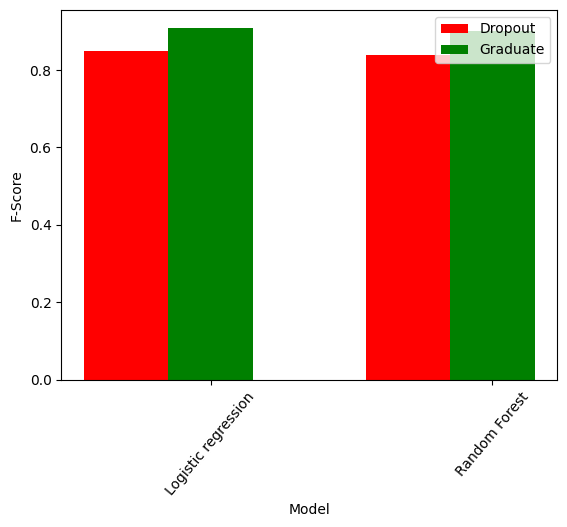

In [168]:
# visualisation of comparison of models

vis=f1_df2
N = 2
ind = np.arange(N)  
width = 0.3
yvals =list(vis[vis['category']=='Dropout'].sort_values(by='classifier')['f1-score'])
barf = plt.bar(ind, yvals, width, color = 'r') 
nvals =list(vis[vis['category']=='Graduate'].sort_values(by='classifier')['f1-score'])
barm = plt.bar(ind+width, nvals, width, color='g')
plt.xlabel("Model") 
plt.ylabel('F-Score') 
plt.xticks(ind+width,[
                      'Logistic regression', 
                      'Random Forest'
                     ], rotation=50) 
plt.legend( (barf, barm), ('Dropout', 'Graduate') ) 
plt.show() 

In [169]:
# Coefficients of chosen model
coefficients(df_with_dummies,'Target')

training model accuracy: 0.886


/Users/alex.smithglean.co/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Feature,Coefficients,abs_coef
0,Educational special needs,-0.276346,0.276346
1,Debtor,-1.658175,1.658175
2,Gender,-0.291159,0.291159
3,Scholarship holder,1.048221,1.048221
4,Age at enrollment,-0.058560,0.058560
5,International,0.366896,0.366896
6,Curricular units 2nd sem (approved),0.828015,0.828015
7,Marital status_Facto union,0.312633,0.312633
8,Marital status_Legally Separated,-0.228666,0.228666
9,Marital status_Married,0.071575,0.071575
